# fitting monte carlo results to birth death rates from the full simulation
Tim Tyree<br>
3.30.2021

In [1]:
from lib.my_initialization import *
import random,scipy
from lib.compute_slope import *
from lib.compute_sliding_slope import *
from scipy import stats
alpha=0.1

In [71]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A'] #[mHz?]/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A'] #[mHz?]/cm^2



In [72]:
#load osg data
data_mc_fn='osg_output/run_1_to_3_merged.csv'
df=pd.read_csv(data_mc_fn)
df.drop(columns=['dt'],inplace=True)

#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s

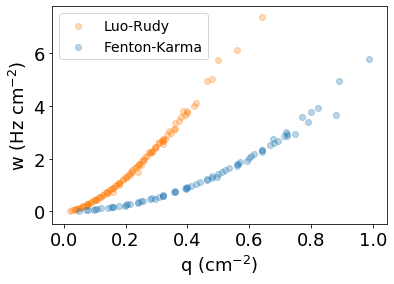

In [81]:
yscale=10**3
fontsize=18
#plot up WJ's results
plt.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1',label='Luo-Rudy')
plt.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0',label='Fenton-Karma')
# plt.ylim([1e-5,1e-2])
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-4)
plt.show()

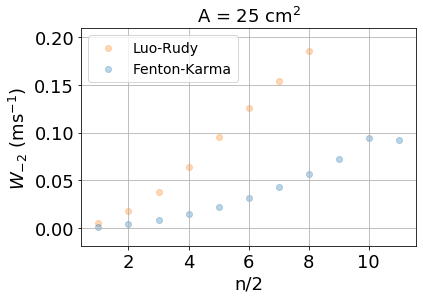

In [87]:
yscale=10**3
fontsize=18
#plot up WJ's results
querylr=lr.A==25
queryfk=fk.A==25
plt.scatter(x=lr[querylr].No2.values,y=lr[querylr].rate.values,alpha=0.3,c='C1',label='Luo-Rudy')
plt.scatter(x=fk[queryfk].No2.values,y=fk[queryfk].rate.values,alpha=0.3,c='C0',label='Fenton-Karma')
# plt.ylim([1e-5,1e-2])
# plt.yscale('log')
# plt.xscale('log')
plt.grid('on')
plt.title(r'A = 25 cm$^2$',fontsize=fontsize)
plt.xlabel(r'n/2',fontsize=fontsize)
plt.ylabel(r'$W_{-2}$ (ms$^{-1}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-4)
plt.show()

In [75]:
#compute w_lr and w_fk using a linear regression of a log-log plot
yscale=10**3
query=fk.q>0.2
x=fk[query].q.values
y=yscale*fk[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.9447060275370367,
 'Delta_m': 0.029617122208703113,
 'b': 1.7091950494051997,
 'Delta_b': 0.024489019143397704,
 'Rsquared': 0.9967057268076673}

In [6]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
yscale=10**3
query=lr.q>0.2
x=lr[query].q.values
y=yscale*lr[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.5439116497751577,
 'Delta_m': 0.03447523242468118,
 'b': 2.7539985812568752,
 'Delta_b': 0.041657775773998006,
 'Rsquared': 0.9935596891108925}

In [8]:
# df.head()

In [76]:
def GetPlotUnivCurve(r,D,kappa,ax,alpha=1.,fontsize=18):
    for L in L_values:
        #get slice
        query=(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
        dff=df[query].copy().drop(columns=['r','D','L','kappa'])
        if dff.size>0:
            #compute x,y values
            A=L**2
            dfd=dff.describe().T.drop(columns=['count'])
            y_values=1/dfd['mean'].values.copy()/A
            dfd.reset_index(inplace=True,drop=True)
            dfd['N']=dfd.index.values+11
            x_values=dfd.N.values/A
            #plot x,y values
            ax.scatter(x_values,y_values,s=10,label=f'A={A:.2f}'+r' $(cm^{2})$',alpha=alpha)
    ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
    ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    ax.legend(fontsize=fontsize-6,ncol=2)
#     ax.set_title(f'r={r} cm, D={D} '+r'cm$^{-2}/s$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)
#     if not saving:
#         plt.show()
#     else:
#         plt.tight_layout()
#         os.chdir(savefig_folder)
#         plt.savefig(savefig_fn, dpi=300)
# #         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()
    return True

r=0.2, D=2.0, kappa=90


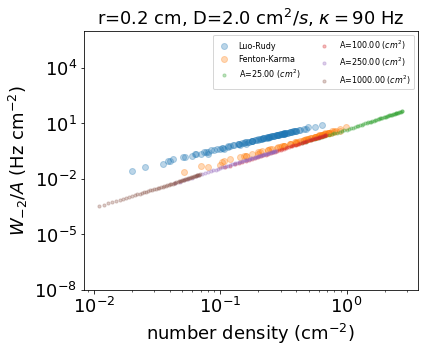

In [78]:
# i,j,k=2,0,2
# i,j,k=2,-1,-1
i,j,k=-5,-1,2
i,j,k=-5,0,2
#one test case
r=r_values[i];D=D_values[j];kappa=kappa_values[k];yscale=10**3
r=0.2;D=2.;kappa=90
print(f'r={r}, D={D}, kappa={kappa}')
#plot the values
figsize=(6,5)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_D_{D}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')
ax.set_title(f'r={r} cm, D={D} '+r'cm$^{2}/s$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

#plot up results from simple monte carlo simulation
retval=GetPlotUnivCurve(r,D,kappa,ax,alpha=0.3)
ax.legend(loc='best',fontsize=fontsize-10,ncol=2)
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
plt.ylim([1e-8,1e+6])
ax.set_yscale('log')
ax.set_xscale('log')

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

__Results__: 
- There apppears to be no dependence on A_{domain} for all parameters
- There apppears to be no dependence on D_{spiral tips} for some parameters

In [252]:
def agg_over_A(r,D,kappa):
    '''aggregate x,y values over A'''
    xvl=[];yvl=[];
    for L in L_values:
        #get slice
        query=(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
        dff=df[query].copy().drop(columns=['r','D','L','kappa'])
        if dff.size>0:
            #compute x,y values
            A=L**2
            dfd=dff.mean()
            x_values=np.array([eval(iv) for iv in dfd.index.values])/A
            y_values=dfd.values.copy()**-1/A
            xvl.append(x_values)
            yvl.append(y_values)
    if len(xvl)==0:
        return None,None
    x_values=np.concatenate(xvl)
    y_values=np.concatenate(yvl)
    return x_values,y_values

#         dfd=dff.describe().T.drop(columns=['count'])
#         y_values=1/dfd['mean'].values.copy()/A
#         dfd.reset_index(inplace=True,drop=True)
#         dfd['N']=dfd.index.values+Nmin
#         x_values=dfd.N.values/A

In [253]:
def agg_over_D(r,kappa):
    '''aggregate over D'''
    xvl=[];yvl=[];
    for D in D_values:
        x_values,y_values=agg_over_A(r,D,kappa)
        if x_values is not None:
            xvl.append(x_values)
            yvl.append(y_values)
    if len(xvl)==0:
        return None,None
    x_values=np.concatenate(xvl)
    y_values=np.concatenate(yvl)
    return x_values,y_values

In [164]:
#simple test cases
x_values,y_values=agg_over_A(r=.5,D=0.5,kappa=1)
assert(not np.isnan(y_values).any())
x_values,y_values=agg_over_D(r=.5,kappa=1)
assert(not np.isnan(y_values).any())

r=0.2, kappa=95


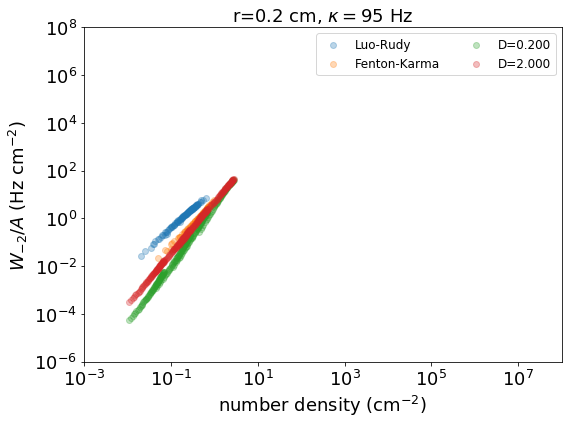

In [160]:
#plot over D
i,j=2,-6
r=r_values[i];kappa=kappa_values[j];yscale=10**3
print(f'r={r}, kappa={kappa}')
yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')

for D in D_values:#[0.2]:#:
    x_values,y_values=agg_over_A(r,D,kappa)
    if x_values is not None and x_values.shape[0]>0:
        #plot x,y values
        ax.scatter(x_values,y_values,label=f"D={D:.3f}",alpha=alpha)
        if np.isnan(y_values).any():
            print(f"D={D}")

    
ax.legend(loc='lower right')
ax.set_xlim([1e-3,1e+8])
ax.set_ylim([1e-6,1e+8])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [150]:
savefig_fn

'model_comparison_r_0.25_k_100.png'

In [161]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
# x_values,y_values=agg_over_A(r=0.2,D=.5,kappa=0.2)
x=x_values
y=y_values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 2.154967056452899,
 'Delta_m': 0.004583433030977261,
 'b': 1.6415949057235386,
 'Delta_b': 0.009464433759046932,
 'Rsquared': 0.9997354294750499}

In [111]:
#TODO: filter to csv of slopes, Rsquared values and input parameters
# TODO: determine Nmin from raw
# Nmin=5#11.... Nmin=5 is currently ignored :(
#TODO: make function that maps a log file to a dict_out with mean stopping time values

In [165]:
yscale=10**3
for kappa in kappa_values:
    #plot over r holding kappa fixed
    #     i=2
    #     kappa=kappa_values[i];
    #     print(f'kappa={kappa}')

    #plot the values
    figsize=(8,6)
    fontsize=18
    saving=True
    savefig_folder=f'{nb_dir}/../fig'
    savefig_fn=f'model_comparison_k_{kappa}.png'
    fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

    #plot up results from full simulation
    ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1',label='Luo-Rudy')
    ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0',label='Fenton-Karma')

    # for kappa in kappa_values:
    for r in r_values:
        x_values,y_values=agg_over_D(r,kappa)
        if x_values is not None:
            #plot x,y values
            ax.scatter(x_values,y_values,label=f"r={r:.2f}",alpha=alpha)

            
    ax.legend(loc='lower right')

    # ax.set_xlim([0,1])
    # ax.set_ylim([0,1])

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1e-3,1e+6])
    ax.set_ylim([1e-6,1e+6])

    ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
    ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    ax.legend(fontsize=fontsize-6,ncol=2)
    ax.set_title(r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

    fig.tight_layout()
    if not saving:
        plt.show()
    else:
        plt.tight_layout()
        os.chdir(savefig_folder)
        plt.savefig(savefig_fn, dpi=300)
    #         print(f"saved figure in \n\t{savefig_fn}")
        plt.close()

/home/timothytyree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  del sys.path[0]


In [166]:
# #plot over kappa holding r fixed
# i=2
# r=r_values[i];
# print(f'r={r}')
yscale=10**3
for r in r_values:
    #plot the values
    figsize=(8,6)
    fontsize=18
    saving=True
    savefig_folder=f'{nb_dir}/../fig'
    savefig_fn=f'model_comparison_r_{r}.png'
    fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

    #plot up results from full simulation
    ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1',label='Luo-Rudy')
    ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0',label='Fenton-Karma')

    for kappa in kappa_values:
        x_values,y_values=agg_over_D(r,kappa)
        if x_values is not None:
            #plot x,y values
            ax.scatter(x_values,y_values,label=f"r={r:.2f}",alpha=alpha)



    ax.legend(loc='lower right')

    # ax.set_xlim([0,1])
    # ax.set_ylim([0,1])

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1e-3,1e+6])
    ax.set_ylim([1e-6,1e+6])
    ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
    ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    ax.legend(fontsize=fontsize-6,ncol=2)
    ax.set_title(f'r={r} cm ', fontsize=fontsize)

    fig.tight_layout()
    if not saving:
        plt.show()
    else:
        plt.tight_layout()
        os.chdir(savefig_folder)
        plt.savefig(savefig_fn, dpi=300)
    #         print(f"saved figure in \n\t{savefig_fn}")
        plt.close()

/home/timothytyree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  del sys.path[0]


# comparing rmse at high densities
compute w versus q and find r,kappa with smalles RMSE_lr,fk

In [169]:
#get df into the right schema
#iterate over settings, counting the number of trials
count=0
dg_lst=[]
for r in r_values:
    for D in D_values:
        for kappa in kappa_values:
            count=count+1
            xv,yv=agg_over_A(r,D,kappa)
            if xv is not None:
                dg = pd.DataFrame({'q':xv,'w':yv})
                dg['r']=r
                dg['D']=D
                dg['kappa']=kappa
                dg_lst.append(dg)
print(count)

/home/timothytyree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  del sys.path[0]


5175


In [170]:
# def routine(item):
#     r,D,kappa=item
#     return PlotUnivCurve(r,D,kappa)

# #run plotting in parallel
# b = db.from_sequence(queue, npartitions=9).map(routine)
# start = time.time()
# retval = list(b)
# print(f"run time was {time.time()-start:.2f} seconds.")
# beep(10)

In [171]:
dg=pd.concat(dg_lst)
dg.head()

,q,w,r,D,kappa
0,0.44,0.014133,0.1,0.2,5
1,0.48,0.016689,0.1,0.2,5
2,0.52,0.019371,0.1,0.2,5
3,0.56,0.022346,0.1,0.2,5
4,0.60,0.025879,0.1,0.2,5


In [172]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
yscale=10**3
x=lr.q.values
y=yscale*lr.w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_lr=dict_out.copy()
#predict the values functionally over all q
m=dict_out['m'];b=dict_out['b']
q_foo = lambda q: m*q+b
dg['w_lr']=np.exp(q_foo(np.log(dg['q'])))

x=fk.q.values
y=yscale*fk.w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_fk=dict_out.copy()
#predict the values functionally over all q
m=dict_out['m'];b=dict_out['b']
q_foo = lambda q: m*q+b
dg['w_fk']=np.exp(q_foo(np.log(dg['q'])))

In [173]:
#compute the square errors 
dg['se_w_fk']=(dg['w']-dg['w_fk'])**2
dg['se_w_lr']=(dg['w']-dg['w_lr'])**2


In [190]:
dg_fn='w_vs_q_agg_over_A.csv'
os.chdir(data_folder)
dg.to_csv(dg_fn,index=False)

In [212]:
qmin=0.3;qmax=1.;
#compute the root mean squared errors over various axes
kappa_lst=[];r_lst=[];rmse_lr_lst=[];rmse_fk_lst=[];
for r in r_values:
    for kappa in kappa_values:
#         print(f"for r={r}, kappa={kappa},")
        query=(dg.r==r)&(dg.kappa==kappa)&(dg.q>qmin)&(dg.q<qmax)
        qu=dg[query]
        rmse_lr=np.sqrt(qu.se_w_lr.mean())
        rmse_fk=np.sqrt(qu.se_w_fk.mean())
#         print(f"\tRMSE = {rmse_lr:.6f} (LR) and RMSE = {rmse_fk:.6f} (FK)")
        r_lst.append(r)
        kappa_lst.append(kappa)
        rmse_lr_lst.append(rmse_lr)
        rmse_fk_lst.append(rmse_fk)

In [213]:
dh=pd.DataFrame({
    'r':r_lst,
    'kappa':kappa_lst,
    'rmse_lr':rmse_lr_lst,
    'rmse_fk':rmse_fk_lst,
    
})

In [214]:
#and the top 5 matches for either model is... (FK)
print(f"The top 5 for the Fenton-Karma model:")
dh.sort_values(by='rmse_fk').head()

The top 5 for the Fenton-Karma model:


,r,kappa,rmse_lr,rmse_fk
252,0.60,10,5.577310,0.104610
376,0.85,5,5.502048,0.104760
203,0.50,15,5.578005,0.149387
155,0.40,25,5.559929,0.192856
351,0.80,5,5.758992,0.220277


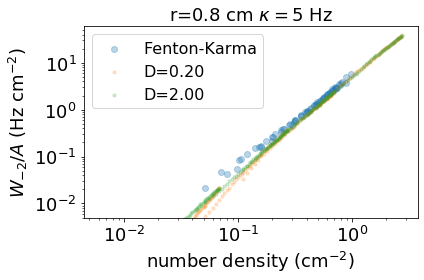

In [210]:
#plot over D the top 5 results for the FK model
r=0.85;kappa=5;
# r=0.6;kappa=10;
# r=0.5;kappa=15;
# r=0.4;kappa=25;
# r=0.8;kappa=5;

# r=0.2;kappa=100;
yscale=10**3

#plot the values
figsize=(6,4)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'fk_model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot up results from full simulation
# ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')

for D in [0.2,2]:#D_values:
    x_values,y_values=agg_over_A(r,D,kappa)
    #plot x,y values
    ax.scatter(x_values,y_values,label=f"D={D:.2f}",alpha=alpha,s=10)

    
ax.legend(loc='lower right')

# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([1e-3,1e+6])
# ax.set_ylim([1e-6,1e+6])

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-2,ncol=1)
ax.set_title(f'r={r} cm '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

In [219]:
#and the top 5 matches for either model is... (LR)
print(f"The top 5 for the Luo-Rudy model:")
dh.sort_values(by='rmse_lr').head()

The top 5 for the Luo-Rudy model:


,r,kappa,rmse_lr,rmse_fk
354,0.80,20,0.699256,5.477719
281,0.65,30,0.782706,5.292807
257,0.60,35,0.838705,5.173361
403,0.90,15,0.858338,5.171942
428,0.95,15,0.875009,5.973875


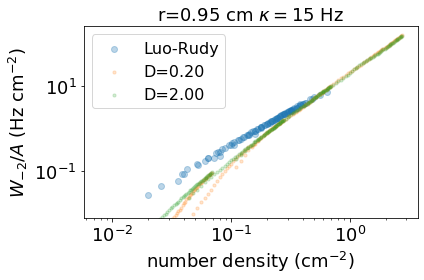

In [224]:
#plot over D the top 5 results for the LR model
r=0.8;kappa=20;
r=0.65;kappa=30;
r=0.6;kappa=35;
r=0.90;kappa=15;
r=0.95;kappa=15;

# r=0.2;kappa=100;
yscale=10**3

#plot the values
figsize=(6,4)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'lr_model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
# ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')

for D in [0.2,2]:#D_values:
    x_values,y_values=agg_over_A(r,D,kappa)
    #plot x,y values
    ax.scatter(x_values,y_values,label=f"D={D:.2f}",alpha=alpha,s=10)

    
ax.legend(loc='lower right')

# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([1e-3,1e+6])
# ax.set_ylim([1e-6,1e+6])

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-2,ncol=1)
ax.set_title(f'r={r} cm '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

In [180]:
#try some root finding for mse_fk,lr(r,k) for D = 2.0 fixed
#compute the root mean squared errors over various axes
kappa_lst=[];r_lst=[];rmse_lr_lst=[];rmse_fk_lst=[];
for r in r_values:
    for kappa in kappa_values:
#         print(f"for r={r}, kappa={kappa},")
        query=(dg.r==r)&(dg.kappa==kappa)&(dg.D==2.0)
        qu=dg[query]
        rmse_lr=np.sqrt(qu.se_w_lr.mean())
        rmse_fk=np.sqrt(qu.se_w_fk.mean())
#         print(f"\tRMSE = {rmse_lr:.6f} (LR) and RMSE = {rmse_fk:.6f} (FK)")
        r_lst.append(r)
        kappa_lst.append(kappa)
        rmse_lr_lst.append(rmse_lr)
        rmse_fk_lst.append(rmse_fk)

In [181]:
beep(10)

0

In [191]:

dh_fn='rmse_by_kappa_r_agg_over_A_D.csv'
os.chdir(data_folder)
dh.sort_values(by='rmse_lr').to_csv(dh_fn,index=False)

'/home/timothytyree/Documents/GitHub/bgmc/python/data'

In [217]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
yscale=10**3
query=fk.q>qmin
x=fk[query].q.values
y=yscale*fk[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.9808174869130641,
 'Delta_m': 0.040162861489782056,
 'b': 1.7276866248433098,
 'Delta_b': 0.02718105601530214,
 'Rsquared': 0.9950908719464067}

In [218]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
yscale=10**3
query=lr.q>qmin
x=lr[query].q.values
y=yscale*lr[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.5066576301521712,
 'Delta_m': 0.06862942082109318,
 'b': 2.718534204162766,
 'Delta_b': 0.06766693409414234,
 'Rsquared': 0.9871980588327004}

# comparing/fitting slopes at high densities
-TODO: plot lr and fk in excel with lines and equations shown on log log plot


In [276]:
#DONE: save dg and dh as csv
#TODO: save lr and fk as csv
#TODO: plot lr and fk in excel with lines and equations shown on log log plot

#TODO: compute slope of each parameter setting in the range [qmin,qmax]
#TODO: find parameter settings that match in slope and have low rmse for lr or fk
#TODO: start simulation on those settings with a wide range of number densities for each promising r,D,kappa item

# TODO: collect results in one page .pdf
#   - effect of increasing r
#   - effect of increasing kappa
#   - effect on increasing D at low densities
#   - simple way to scale r,D,kappa onto the same axis?

# simple way to scale r,D,kappa onto the same axis for d~unity

In [281]:
os.chdir(data_folder)
dg_fn='w_vs_q_agg_over_A.csv'
dg=pd.read_csv(dg_fn)

In [283]:
dg.head()

,q,w,r,D,kappa,w_lr,w_fk,se_w_fk,se_w_lr
0,0.44,0.014133,0.1,0.2,5,4.592246,1.132509,1.250764,20.959115
1,0.48,0.016689,0.1,0.2,5,5.295488,1.333459,1.733883,27.865726
2,0.52,0.019371,0.1,0.2,5,6.037135,1.549659,2.341782,36.213491
3,0.56,0.022346,0.1,0.2,5,6.816087,1.780961,3.092725,46.154917
4,0.60,0.025879,0.1,0.2,5,7.631354,2.027227,4.005393,57.843254


In [318]:
dg['d']=np.pi*dg.r**2*dg.q
dg['u']=dg.w/dg.kappa*np.pi*dg.r**2
dg['c']=1/dg.D*(np.pi*dg.r**2*dg.kappa)

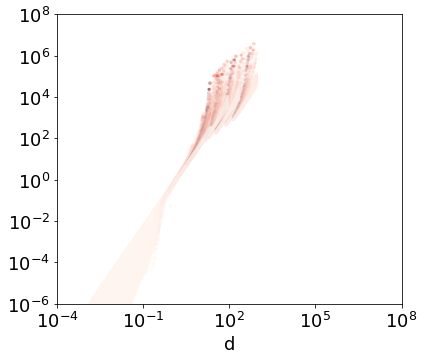

In [319]:
x_values=dg.d.values
y_values=dg.u.values
c_values=dg.c.values

#plot the values
figsize=(6,5)
fontsize=18
saving=False
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'univ_curve_bgmc.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

ax.scatter(x_values,y_values,alpha=0.1,c=c_values, cmap='Reds',s=5)

# ax.legend(loc='lower right')
ax.set_xlim([1e-4,1e+8])
ax.set_ylim([1e-6,1e+8])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'd', fontsize=fontsize)
# ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# computing mean values from merged cloud output

In [322]:
#get df into the right schema
#iterate over settings, counting the number of trials
count=0
df_mean_lst=[]
for r in r_values:
    for D in D_values:
        for kappa in kappa_values:
            for L in L_values:
                #get slice
                query=(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
                dff=df[query].copy().drop(columns=['r','D','L','kappa'])
                if dff.size>0:
                    #compute x,y values
                    A=L**2
                    dfd=dff.mean()
                    xv=np.array([eval(iv) for iv in dfd.index.values])/A
                    yv=dfd.values.copy()**-1/A
                    if xv is not None:
                        df_mean = pd.DataFrame({'q':xv,'w':yv})
                        df_mean['A']=A
                        df_mean['r']=r
                        df_mean['D']=D
                        df_mean['kappa']=kappa
                        df_mean_lst.append(df_mean)
                        count=count+1
print(count)
df_mean=pd.concat(df_mean_lst)

/home/timothytyree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in reciprocal


5543


In [323]:
dfm_fn='df_mean_runs_1_to_3.csv'
os.chdir(data_folder)
df_mean.to_csv(dfm_fn,index=False)

# visualizing first order universal curve

In [7]:
os.chdir(data_folder)
dg_fn='df_mean_runs_1_to_3.csv'
dg=pd.read_csv(dg_fn)

In [242]:
dg['d']=np.pi*dg.r**2*dg.q
dg['u']=dg.w/dg.kappa*np.pi*dg.r**2
# dg['c']=dg.D/(dg.kappa)/dg.A
dg['c']=dg.A

In [243]:
query=(dg.d>=1)&(dg.d<=3)
x=dg[query].d.values
y=dg[query].u.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 2.0543766223351887,
 'Delta_m': 0.0018045944615163387,
 'b': -0.6983549241742513,
 'Delta_b': 0.0010488531583719481,
 'Rsquared': 0.9927846242772614}

In [244]:
# TODO: generate linear data
ld_values=np.linspace(-10,10,81)
lu_values=dict_out['m']*ld_values + dict_out['b']
# ld_values

In [245]:
eqn_text=u'$\log(u)=2.054(2)\;\log(d)$\n\t\t$- 0.698(1)$\n\t\t$R^2=0.993$'

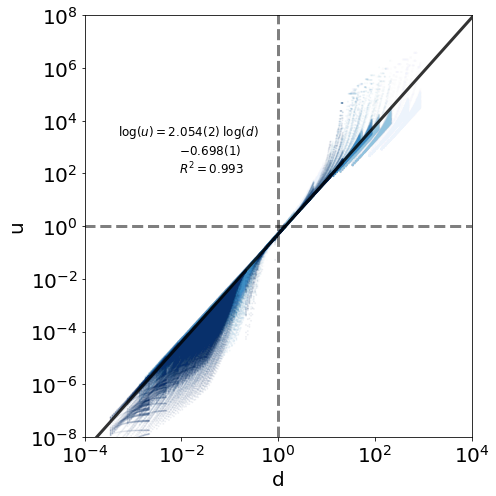

In [259]:
x_values=dg.d.values
y_values=dg.u.values
c_values=np.log(dg.c.values)

#plot the values
figsize=(7,7)
fontsize=20
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'univ_curve_bgmc_first_order.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot axes
ax.plot(np.exp(ld_values),1+0*np.exp(lu_values),'--',c='k',lw=3,alpha=.5,label='x axis')
ax.plot(1+0*np.exp(ld_values),np.exp(lu_values),'--',c='k',lw=3,alpha=.5,label='y axis')

#plot results
ax.scatter(x_values,y_values,alpha=0.05,c=c_values, cmap='Blues',s=1,label='simulation')
ax.plot(np.exp(ld_values),np.exp(lu_values),c='black',lw=3,alpha=.8,label='linear fit')

# ax.legend(loc='lower right')
ax.set_xlim([1e-4,1e+4])
ax.set_ylim([1e-8,1e+8])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'u',fontsize=fontsize)
ax.set_xlabel(r'd', fontsize=fontsize)
# ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

ax.annotate(eqn_text, xy=(0.8, 1.1), xytext=(.0005, 100),fontsize=fontsize-8,
            arrowprops=dict(facecolor='white', shrink=1.0,edgecolor='white'),
            )

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [247]:
# DONE: compute slope of ^this curve near the origin
# DONE: plot ^that line and annotate the equation
print((np.exp(-0.697),np.exp(-0.698),np.exp(-0.699)))

(0.4980772965729617, 0.49757946823204485, 0.49708213747063773)


$$
d =\frac{N\pi r^2}{A},\quad u=\frac{W_{-2}\pi r^2}{\kappa A}
$$

__Corollary__<br>
 We observe that $m=2.054(2)$ and $b=0.698(1)$ for $d\in[1,3]$ in the equation
$$\log(u)=m\log(d)-b.$$
 
<!-- $$\log(u)=\log(d^m)-\log(e^b)$$
$$\log(u)=\log(d^me^{-b})$$
$$u=d^me^{-b}$$
 -->
Substituting,

$$
\frac{W_{-2}\pi r^2}{\kappa A} = e^{-b}\Big(\frac{N\pi r^2}{A}\Big)^m
$$

Noting $e^{-b}=0.4975(5)\approx1/2$ and $m=2.054(2)\approx 2$,<br>
we may approximate for $d\sim 1$,

$$
\frac{W_{-2}\pi r^2}{\kappa A} \approx \frac{1}{2}\Big(\frac{N\pi r^2}{A}\Big)^2
$$
Suggesting
$$
W_{-2}\approx \frac{\kappa\pi r^2}{2A} N^2
$$

Or for $w=W_{-2}/A$ and $q=N/A$,

$$
w\approx \frac{\kappa\pi r^2}{2} q^2
$$

Suggesting the exponential of the y-intercept of the log(w)-log(q) plot is approximately $B\equiv\frac{\kappa\pi r^2}{2}$.





dudududu

In [248]:
#compute w_lr and w_fk using a linear regression of a log-log plot
yscale=10**3
query=fk.q>0.3
x=fk[query].q.values
y=yscale*fk[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.9808174869130641,
 'Delta_m': 0.040162861489782056,
 'b': 1.7276866248433098,
 'Delta_b': 0.02718105601530214,
 'Rsquared': 0.9950908719464067}

In [256]:
#compute w_lr and w_fk using a linear regression of a log-log plot
yscale=10**3
query=lr.q>0.3
x=lr[query].q.values
y=yscale*lr[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.5066576301521712,
 'Delta_m': 0.06862942082109318,
 'b': 2.718534204162766,
 'Delta_b': 0.06766693409414234,
 'Rsquared': 0.9871980588327004}

In [273]:
print((np.exp(1.7),np.exp(1.73),np.exp(1.76)))
print((np.exp(2.72-.07),np.exp(2.72),np.exp(2.72+0.07)))

(5.4739473917272, 5.6406539084283205, 5.812437394402589)
(14.154038645375808, 15.1803222449539, 16.28101980178843)


The death rate for the Fenton-Karma model near $d\sim1$ has $m=1.98(4)\approx 2$ and should approximately support the relation $e^{1.73(3)}= 5.6(2) \text{cm}^2/\text{s} \approx B=\frac{1}{2}\kappa \pi r^2$.

The death rate for the Luo-Rudy model near $d\sim1$ has $m=1.51(7)\approx 3/2$ and shouldn't approximately support the relation $e^{2.72(7)}=14\pm1 \text{cm}^2/\text{s}\approx B=\frac{1}{2}\kappa \pi r^2$.


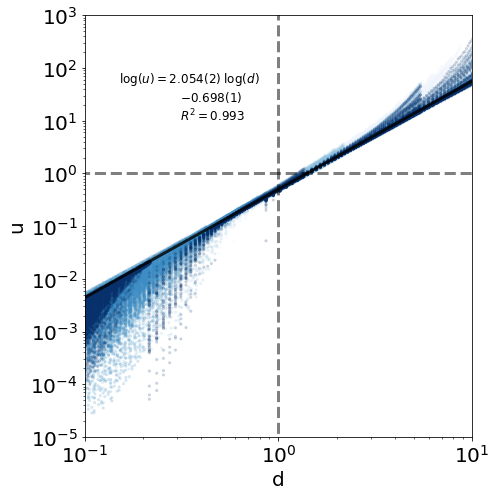

In [276]:
x_values=dg.d.values
y_values=dg.u.values
c_values=np.log(dg.c.values)

#plot the values
figsize=(7,7)
fontsize=20
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'univ_curve_bgmc_first_order_zoomed.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot axes
ax.plot(np.exp(ld_values),1+0*np.exp(lu_values),'--',c='k',lw=3,alpha=.5,label='x axis')
ax.plot(1+0*np.exp(ld_values),np.exp(lu_values),'--',c='k',lw=3,alpha=.5,label='y axis')

#plot results
ax.scatter(x_values,y_values,alpha=0.15,c=c_values, cmap='Blues',s=5,label='simulation')
ax.plot(np.exp(ld_values),np.exp(lu_values),c='black',lw=3,alpha=.8,label='linear fit')

# ax.legend(loc='lower right')
ax.set_xlim([1e-1,1e+1])
ax.set_ylim([1e-5,1e+3])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'u',fontsize=fontsize)
ax.set_xlabel(r'd', fontsize=fontsize)
# ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

ax.annotate(eqn_text, xy=(0.9, 1.1), xytext=(0.15, 10),fontsize=fontsize-8,
            arrowprops=dict(facecolor='white', shrink=1.0, edgecolor='white'),
            )

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [271]:
#TODO: test compute b for 5 highest scoring simulations for fk model
calc_b = lambda r,k:0.5*k*np.pi*r**2
print('B for 5 highest scoring simulations for FK model:')
print(calc_b(.6,10))
print(calc_b(.85,5))
print(calc_b(.5,15))
print(calc_b(.4,25))
print(calc_b(.8,5))

print(f"the predicted B value for the FK model is:")
print(np.exp(1.7276866248433098))

B for 5 highest scoring simulations for FK model:
5.654866776461628
5.674501730546563
5.890486225480862
6.283185307179588
5.02654824574367
the predicted B value for the FK model is:
5.627620041733562


In [275]:
print('B for 5 highest scoring simulations for LR model:')
print(calc_b(.8,20))
print(calc_b(.65,30))
print(calc_b(.6,35))
print(calc_b(.9,15))
print(calc_b(.95,15))
print(f"the predicted B value for the LR model is:")
print(np.exp(2.718534204162766))

B for 5 highest scoring simulations for LR model:
20.10619298297468
19.909843442125315
19.792033717615695
19.085175370557995
21.26465527398591
the predicted B value for the LR model is:
15.158087291731396


# TODO(later):  search for higher order universal curve for d far from unity


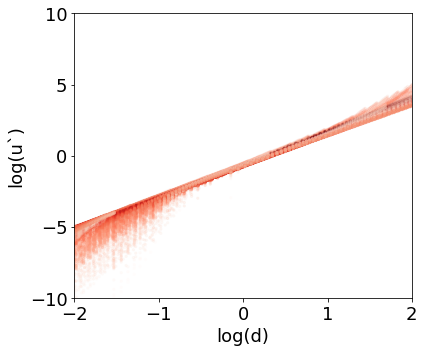

In [297]:
dg['d']=np.pi*dg.r**2*dg.q
dg['u']=dg.w/dg.kappa*np.pi*dg.r**2
dg['c']=dg.D/(dg.A*dg.kappa)
# dg['c']=dg.A#/(np.pi*dg.r**2)
# dg['c']=dg.A

x_values=np.log(dg.d.values)
y_values=np.log(dg.u.values)
c_values=np.log(dg.c.values)

y_values=y_values - (x_values**1)/(c_values) #+ x_values*c_values**(1)
# x_values=x_values + x_values*(c_values**1)

#plot the values
figsize=(6,5)
fontsize=18
saving=False
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'univ_curve_bgmc_higher_order.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

ax.scatter(x_values,y_values,alpha=0.1,c=c_values, cmap='Reds',s=5)

# # ax.legend(loc='lower right')
ax.set_xlim([-2,2])
ax.set_ylim([-10,10])

# ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel(r'log(d)', fontsize=fontsize)
ax.set_ylabel(r'log(u`)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# plot lr,fk curves with linear fits annotated

In [6]:
#compute w_lr and w_fk using a linear regression of a log-log plot
yscale=10**3
query=fk.q>0.3
x=fk[query].q.values
y=yscale*fk[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
m_fk=dict_out['m'];b_fk=dict_out['b']
dict_out

{'m': 1.9808174869130641,
 'Delta_m': 0.040162861489782056,
 'b': 1.7276866248433098,
 'Delta_b': 0.02718105601530214,
 'Rsquared': 0.9950908719464067}

In [7]:
#compute w_lr and w_fk using a linear regression of a log-log plot
query=lr.q>0.3
x=lr[query].q.values
y=yscale*lr[query].w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
m_lr=dict_out['m'];b_lr=dict_out['b']
dict_out

{'m': 1.5066576301521712,
 'Delta_m': 0.06862942082109318,
 'b': 2.718534204162766,
 'Delta_b': 0.06766693409414234,
 'Rsquared': 0.9871980588327004}

In [8]:
fk_text=u'$\log(w/1_w)=1.98(4)\;\log(q/1_q)$\n\t\t$+1.73(3)$\n\t\t$R^2=0.995$'
lr_text=u'$\log(w/1_w)=1.50(7)\;\log(q/1_q)$\n\t\t$2.72(7)$\n\t\t$R^2=0.987$'

In [9]:
# generate linear data
log_x_values=np.linspace(-10,10,81)
log_y_values_lr=m_lr*log_x_values +b_lr
log_y_values_fk=m_fk*log_x_values +b_fk


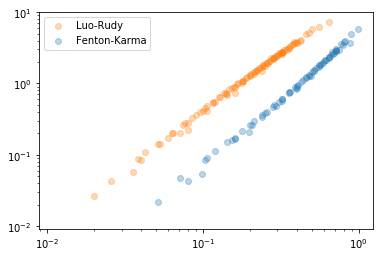

In [10]:
#plot up WJ's results
plt.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1',label='Luo-Rudy')
plt.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0',label='Fenton-Karma')


# plt.ylim([1e-5,1e-2])
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

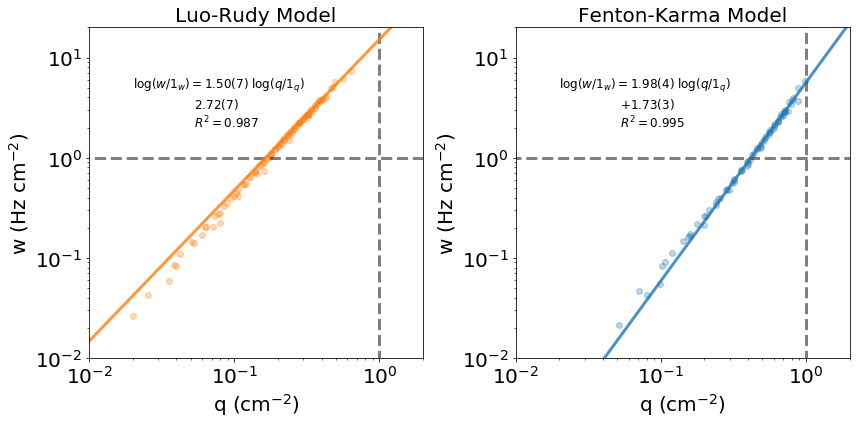

In [11]:
#plot the values
figsize=(12,6)
fontsize=20
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'full_model_results.png'
fig, axs = plt.subplots(ncols=2,figsize=figsize)# ax=axs[1]

#Luo-Rudy model
ax=axs[0]
#plot axes
ax.plot(np.exp(log_x_values),1+0*np.exp(log_y_values_lr),'--',c='k',lw=3,alpha=.5,label='x axis')
ax.plot(1+0*np.exp(log_x_values),np.exp(log_y_values_lr),'--',c='k',lw=3,alpha=.5,label='y axis')
#plot results
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1',label='Luo-Rudy')
ax.plot(np.exp(log_x_values),np.exp(log_y_values_lr),c='C1',lw=3,alpha=.8,label='linear fit')
ax.set_xlim([1e-2,2e+0])
ax.set_ylim([1e-2,2e+1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
ax.set_ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title(f'Luo-Rudy Model', fontsize=fontsize)
ax.annotate(lr_text, xy=(.02, 2), xytext=(.02, 2),fontsize=fontsize-8,
            arrowprops=dict(facecolor='white', shrink=1.0,edgecolor='white'))
# ax.legend(fontsize=fontsize)

#Fenton-Karma model
ax=axs[1]
#plot axes
ax.plot(np.exp(log_x_values),1+0*np.exp(log_y_values_fk),'--',c='k',lw=3,alpha=.5,label='x axis')
ax.plot(1+0*np.exp(log_x_values),np.exp(log_y_values_fk),'--',c='k',lw=3,alpha=.5,label='y axis')
#plot results
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0',label='Fenton-Karma')
ax.plot(np.exp(log_x_values),np.exp(log_y_values_fk),c='C0',lw=3,alpha=.8,label='linear fit')
ax.set_xlim([1e-2,2e+0])
ax.set_ylim([1e-2,2e+1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
ax.set_ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title(f'Fenton-Karma Model', fontsize=fontsize)
ax.annotate(fk_text, xy=(.02, 2), xytext=(.02, 2),fontsize=fontsize-8,
            arrowprops=dict(facecolor='white', shrink=1.0,edgecolor='white'))
# ax.legend(fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# Measuring slope for all mean slopes

In [23]:
from lib.compute_sliding_slope import *


In [3]:
#import mean results
os.chdir(data_folder)
df_fn='df_mean_runs_1_to_3.csv'
df=pd.read_csv(df_fn)
# df.head()
df['d']=np.pi*df.r**2*df.q
df['u']=df.w/df.kappa*np.pi*df.r**2
# dg['c']=dg.D/(dg.kappa)/dg.A
df['c']=df.A
df['x']=np.log(df.d)
df['y']=np.log(df.u)

In [4]:
#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
A_values=np.array(sorted(set(df.A.values)))#cm^2
# L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s

In [24]:
# r=r_values[0];D=D_values[0];A=A_values[1];kappa=kappa_values[1]
xavg_values_lst=[];slope_values_lst=[];Rsquared_values_lst=[];
r_lst=[];D_lst=[];A_lst=[];kappa_lst=[]
for r in r_values:
    for D in D_values:
        for A in A_values:
            for kappa in kappa_values:
                query=(df.r==r)&(df.D==D)&(df.A==A)&(df.kappa==kappa)
                dff=df[query].copy()#.drop(columns=['r','D','A','kappa'])
                boo=dff.size>0
                if boo:
                    #measure dlogu_dlogd versus d
                    x_values=dff.d.values
                    y_values=dff.u.values
                    xavg_values,slope_values,Rsquared_values = compute_sliding_slope_loglog(x_values,y_values)
                    #record the results
                    xavg_values_lst.append(xavg_values)
                    slope_values_lst.append(slope_values)
                    Rsquared_values_lst.append(Rsquared_values)
                    r_lst.append(r);D_lst.append(D);A_lst.append(A);kappa_lst.append(kappa)
beep(4)

/home/timothytyree/Documents/GitHub/bgmc/python/lib/compute_slope.py:16: RuntimeWarning: invalid value encountered in subtract
  SSxy=np.dot((x-xbar),(y-ybar))
/home/timothytyree/Documents/GitHub/bgmc/python/lib/compute_slope.py:17: RuntimeWarning: invalid value encountered in subtract
  SSyy=np.sum((y-ybar)**2)


0

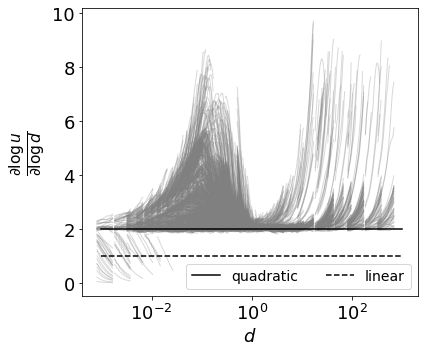

In [29]:
figsize=(6,5)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'log_log_slope_runs_1_to_3.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]
zlst=zip(xavg_values_lst,slope_values_lst,Rsquared_values_lst)
#plot the values
for xavg_values,slope_values,Rsquared_values in zlst:
    ax.plot(xavg_values,slope_values,lw=1,label="_Hidden",alpha=0.3,color='gray')
    # ax.plot(xavg_values,Rsquared_values,lw=2,label="_Hidden")

#plot the reference lines
xv=np.linspace(1e-3,1e3,100)    
ax.plot(xv,2+0*xv,'-',color='k',label='quadratic')
ax.plot(xv,1+0*xv,'--',color='k',label='linear')

#format plot
ax.set_xlabel(r'$d$', fontsize=fontsize)
ax.set_ylabel(r'$\frac{\partial \log\,u}{\partial \log\,d}$', fontsize=fontsize+4)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-4,ncol=2,loc='lower right')
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)
# ax.set_xlim([1e-3,1e+8])
# ax.set_ylim([1e-6,1e+8])
# ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()


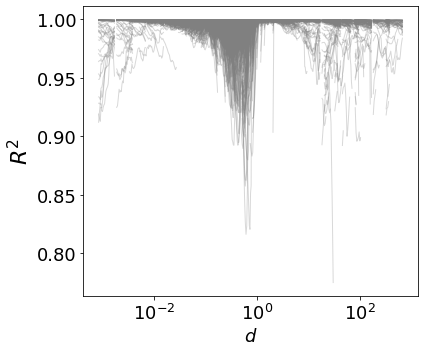

In [30]:
figsize=(6,5)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'log_log_Rsquared_runs_1_to_3.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]
zlst=zip(xavg_values_lst,slope_values_lst,Rsquared_values_lst)
#plot the values
for xavg_values,slope_values,Rsquared_values in zlst:
    ax.plot(xavg_values,Rsquared_values,lw=1,label="_Hidden",alpha=0.3,color='gray')
#     ax.plot(xavg_values,Rsquared_values,lw=2,label="_Hidden")

#plot the reference lines
# xv=np.linspace(1e-3,1e3,100)    
# ax.plot(xv,2+0*xv,'-',color='k',label='quadratic')
# ax.plot(xv,1+0*xv,'--',color='k',label='linear')

#format plot
ax.set_xlabel(r'$d$', fontsize=fontsize)
ax.set_ylabel(r'$R^2$', fontsize=fontsize+4)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-4,ncol=2,loc='lower right')
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)
# ax.set_xlim([1e-3,1e+8])
# ax.set_ylim([1e-6,1e+8])
# ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()


# root cause analysis of subquadratic trials

In [37]:
#root cause analysis/ find what all those subquadratic curves have in common.  
# Do they all exhibit A=1000 cm^2?  Yes.
# If so, do the corresponding r,D,kappa behave a similar way for smaller A?
slope_thresh=1.5
boo_lst=[];boonan_lst=[]
for sv in slope_values_lst:
    boo=(sv<slope_thresh).any()
    boo_lst.append(boo)
    boonan=np.isnan(sv).any()
    boonan_lst.append(boonan)
boo_values=np.array(boo_lst)
boonan_values=np.array(boonan_lst)

/home/timothytyree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [40]:
sum(boo_values)
# sum(boonan_values)

49

In [49]:
assert (np.array(A_lst)[boo_values]>=1000).all()
print(f"all trials with slope less than 1.5 had area of 1000 cm^2")

all trials with slope less than 1.5 had area of 1000 cm^2


In [56]:
print('(r,D,kappa) values that were subquadratic:')
print(list(zip(np.array(r_lst)[boo_values],np.array(D_lst)[boo_values],np.array(kappa_lst)[boo_values])))

(r,D,kappa) values that were subquadratic:
[(0.1, 0.2, 5), (0.1, 0.2, 10), (0.1, 0.2, 15), (0.1, 0.2, 20), (0.1, 0.2, 25), (0.1, 0.2, 30), (0.1, 0.2, 35), (0.1, 0.2, 40), (0.1, 0.2, 45), (0.1, 0.2, 50), (0.1, 0.2, 55), (0.1, 0.2, 60), (0.1, 0.2, 65), (0.1, 0.2, 70), (0.1, 0.2, 75), (0.1, 0.2, 80), (0.1, 0.2, 85), (0.1, 0.2, 90), (0.1, 0.2, 100), (0.1, 0.2, 1000), (0.1, 2.0, 10), (0.1, 2.0, 15), (0.15, 0.2, 5), (0.15, 0.2, 10), (0.15, 0.2, 15), (0.15, 0.2, 20), (0.15, 0.2, 25), (0.15, 0.2, 30), (0.15, 0.2, 35), (0.15, 0.2, 40), (0.15, 0.2, 45), (0.15, 0.2, 50), (0.15, 0.2, 60), (0.15, 0.2, 85), (0.15, 0.2, 95), (0.15, 2.0, 5), (0.2, 0.2, 5), (0.2, 0.2, 10), (0.2, 0.2, 35), (0.2, 0.2, 40), (0.2, 0.2, 50), (0.2, 0.2, 90), (0.25, 0.2, 5), (0.25, 0.2, 35), (0.25, 0.2, 50), (0.3, 0.2, 5), (0.3, 0.2, 10), (0.3, 0.2, 55), (0.4, 0.2, 40)]


In [55]:
print('r values that were subquadratic:')
print(np.array(r_lst)[boo_values])
print('\nD values that were subquadratic:')
print(np.array(D_lst)[boo_values])
print('\nkappa values that were subquadratic:')
print(np.array(kappa_lst)[boo_values])

r values that were subquadratic:
[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.2  0.2  0.2  0.2  0.2  0.2
 0.25 0.25 0.25 0.3  0.3  0.3  0.4 ]

D values that were subquadratic:
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 2.  2.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 2.
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]

kappa values that were subquadratic:
[   5   10   15   20   25   30   35   40   45   50   55   60   65   70
   75   80   85   90  100 1000   10   15    5   10   15   20   25   30
   35   40   45   50   60   85   95    5    5   10   35   40   50   90
    5   35   50    5   10   55   40]


In [64]:
kv=np.array(kappa_lst)[boo_values]
rv=np.array(r_lst)[boo_values]
Dv=np.array(D_lst)[boo_values]
Bv=0.5*np.pi*rv**2*kv
print('B values that were subquadratic:')
print(Bv)

B values that were subquadratic:
[ 0.07853982  0.15707963  0.23561945  0.31415927  0.39269908  0.4712389
  0.54977871  0.62831853  0.70685835  0.78539816  0.86393798  0.9424778
  1.02101761  1.09955743  1.17809725  1.25663706  1.33517688  1.41371669
  1.57079633 15.70796327  0.15707963  0.23561945  0.17671459  0.35342917
  0.53014376  0.70685835  0.88357293  1.06028752  1.23700211  1.41371669
  1.59043128  1.76714587  2.12057504  3.00414797  3.35757715  0.17671459
  0.31415927  0.62831853  2.19911486  2.51327412  3.14159265  5.65486678
  0.49087385  3.43611696  4.90873852  0.70685835  1.41371669  7.77544182
 10.05309649]


In [65]:
bid=-8
print(f'the B={Bv[bid]} value close to that of the FK model had (r,D,kappa)={(rv[bid],Dv[bid],kv[bid])}')

the B=5.6548667764616285 value close to that of the FK model had (r,D,kappa)=(0.2, 0.2, 90)


r=0.2, D=0.2, kappa=90


NameError: name 'L_values' is not defined

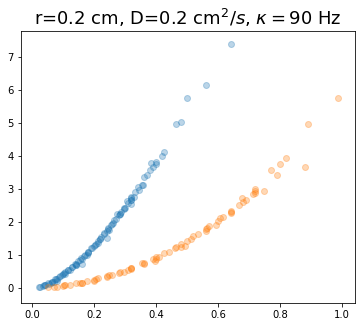

In [69]:
# # i,j,k=2,0,2
# # i,j,k=2,-1,-1
# i,j,k=-5,-1,2
# i,j,k=-5,0,2
# #one test case
# r=r_values[i];D=D_values[j];kappa=kappa_values[k];yscale=10**3
yscale=10**3
r=0.2;D=0.2;kappa=90
print(f'r={r}, D={D}, kappa={kappa}')
#plot the values
figsize=(6,5)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'area_dependent_turning_point_r_{r}_D_{D}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')
ax.set_title(f'r={r} cm, D={D} '+r'cm$^{2}/s$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

#plot up results from simple monte carlo simulation
retval=GetPlotUnivCurve(r,D,kappa,ax,alpha=0.3)
ax.legend(loc='best',fontsize=fontsize-10,ncol=2)
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
plt.ylim([1e-8,1e+6])
ax.set_yscale('log')
ax.set_xscale('log')

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

In [59]:
print('r values that had nan:')
print(np.array(r_lst)[boonan_values])
# print('\nD values that had nan:')
# print(np.array(D_lst)[boonan_values])
print('\nkappa values that had nan:')
print(np.array(kappa_lst)[boonan_values])

r values that had nan:
[ 2.5  2.5  2.5  2.5  2.5  5.   5.   5.   5.   5.   5.   5.   5.   5.
  5.   5.   5.   7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5
  7.5  7.5  7.5  7.5  7.5  7.5  7.5 10.  10.  10.  10.  10.  10.  10.
 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10. ]

kappa values that had nan:
[ 750 1000  500  750 1000  500  750 1000  500  750 1000  500  750 1000
  500  750 1000  500  750 1000  500  750 1000  500  750 1000  500  750
 1000  500  750 1000  500  750 1000  500  750 1000  500  750 1000  500
  750 1000  500  750 1000  250  500  750 1000  500  750 1000 1000]


In [47]:
#all trials with slope less than 1.5 had area of 1000 cm^2
(np.array(A_lst)[boonan_values]>=1000)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [58]:
kv=np.array(kappa_lst)[boonan_values]
rv=np.array(r_lst)[boonan_values]
Bv=0.5*np.pi*rv**2*kv
print('B values that had nan:')
print(Bv)

B values that had nan:
[  7363.10778185   9817.47704247   4908.73852123   7363.10778185
   9817.47704247  19634.95408494  29452.4311274   39269.90816987
  19634.95408494  29452.4311274   39269.90816987  19634.95408494
  29452.4311274   39269.90816987  19634.95408494  29452.4311274
  39269.90816987  44178.64669111  66267.97003666  88357.29338221
  44178.64669111  66267.97003666  88357.29338221  44178.64669111
  66267.97003666  88357.29338221  44178.64669111  66267.97003666
  88357.29338221  44178.64669111  66267.97003666  88357.29338221
  44178.64669111  66267.97003666  88357.29338221  78539.81633974
 117809.72450962 157079.63267949  78539.81633974 117809.72450962
 157079.63267949  78539.81633974 117809.72450962 157079.63267949
  78539.81633974 117809.72450962 157079.63267949  39269.90816987
  78539.81633974 117809.72450962 157079.63267949  78539.81633974
 117809.72450962 157079.63267949 157079.63267949]


In [61]:
#TODO: measure B for lr and fk using ols on sqrt(w) versus q

In [62]:
Bv[-8]

5.6548667764616285

In [80]:
print("r values considered")
print(r_values)
print("\nD values considered")
print(D_values)
print("\nkappa values considered")
print(kappa_values)
print("\nA values considered")
print(A_values)

r values considered
[ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    2.5   5.    7.5  10.  ]

D values considered
[0.2  0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]

kappa values considered
[   1    5   10   15   20   25   30   35   40   45   50   55   60   65
   70   75   80   85   90   95  100  250  500  750 1000]

A values considered
[  20.25         25.           39.000025     50.00003094   56.25
  100.          156.25        188.99925529  250.00036996 1000.00147984]


$$
B=\frac{1}{2}\kappa\pi r^2 \implies \kappa = \frac{2B}{\pi r^2}
$$

In [96]:
#TODO(later for smaller CI): estimate B from slope of sqrt rate density (FK) and (later) from slope of pow(w,2/3) (LR)  
#TODO: estimate kappa for FK model
B = 5.62376
calc_kappa = lambda B,r: 2*B/(np.pi * r**2)
print(f"From the y-intercept of the log-log plot,")
print(f"\tthe FK model has B={B} cm$^2$/s.")
print('Then,')
for r in [0.1,0.2,0.3,0.4,0.5]:
    print(f"\tfor r = {r:.1f} cm, kappa = {calc_kappa(B,r):.0f} Hz.")

From the y-intercept of the log-log plot,
	the FK model has B=5.62376 cm$^2$/s.
Then,
	for r = 0.1 cm, kappa = 358 Hz.
	for r = 0.2 cm, kappa = 90 Hz.
	for r = 0.3 cm, kappa = 40 Hz.
	for r = 0.4 cm, kappa = 22 Hz.
	for r = 0.5 cm, kappa = 14 Hz.
